# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

### Removing features with low variance

In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Univariate feature selection

<font color = blue>SelectKBest removes</font> all but the k highest scoring features

<font color = blue>SelectPercentile</font>  removes all but a user-specified highest scoring percentage of features

using common univariate statistical tests for each feature: false positive rate <font color = blue>SelectFpr</font> , false discovery rate <font color = blue>SelectFdr</font> , or family wise error <font color = blue>SelectFwe</font> 

<font color = blue>GenericUnivariateSelect</font>  allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator

In [9]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest #SelectKBest removes all but the  highest scoring features
from sklearn.feature_selection import chi2 #
X, y = load_iris(return_X_y=True)
X.shape



(150, 4)

In [8]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

### Recursive feature elimination

recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

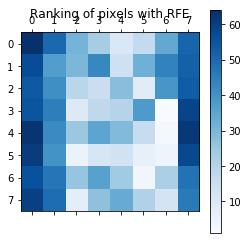

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

Optimal number of features : 3


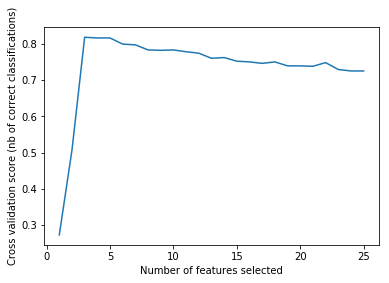

In [17]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Feature selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

C:\Users\bokuc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


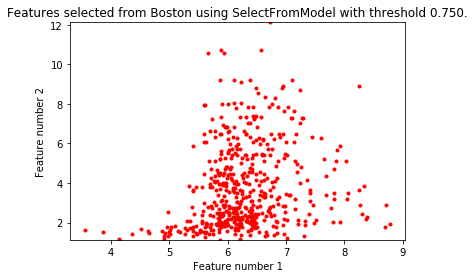

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
X, y = load_boston(return_X_y=True)

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

#### L1-based feature selection

In [21]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

#With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected.
#With Lasso, the higher the alpha parameter, the fewer features selected.


(150, 3)

#### Tree-based feature selection¶

Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer):

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               


(150, 2)

In [23]:
clf.feature_importances_  


array([0.11632134, 0.07763484, 0.37791743, 0.42812639])

### Feature selection as part of a pipeline

Feature selection is usually used as a pre-processing step before doing the actual learning. The recommended way to do this in scikit-learn is to use a sklearn.pipeline.Pipeline:

In [28]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
X, y = make_classification(
    n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
anova_filter = SelectKBest(f_regression, k=5)
clf = svm.SVC(kernel='linear')
anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)

prediction = anova_svm.predict(X)
anova_svm.score(X, y)

# getting the selected features chosen by anova_filter
anova_svm['anova'].get_support()



# Another way to get selected features chosen by anova_filter
anova_svm.named_steps.anova.get_support()



# Indexing can also be used to extract a sub-pipeline.
sub_pipeline = anova_svm[:1]
sub_pipeline

coef = anova_svm[-1].coef_
anova_svm['svc'] is anova_svm[-1]

coef.shape

sub_pipeline.inverse_transform(coef).shape

TypeError: 'Pipeline' object is not subscriptable